In [ ]:
import random
import torch
from docs.plots import * 
import numpy as np
import torch_directml
from globals import COLORS

gpu = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def set_global_seed(seed: int):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)

  # If using CUDA
  if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def random_pc_vector(dim):
  while True:
    x = (2 * torch.rand(dim)) - 1  # random in (-1, 1)
    if torch.norm(x) < 1:
      return x
    
set_global_seed(42)

[poincare]
(distance)


ImportError: attempted relative import beyond top-level package

In [ ]:
x   = random_pc_vector(2)
y   = random_pc_vector(2)
v1  = torch.rand(2)/5
v2  = torch.rand(2)/5
M   = torch.tensor([[-1, -1.5], [0.2, 0.5]])

# POINCARE

#poincare.distance.show(x,device)
#poincare.distance2plane.show(x,v1,device)
#poincare.gyrovector_parallel_transport.show(x,y,device)
#poincare.mobius_add.show(x,y,device)
#poincare.mobius_matvec.show(M,x,device)
#poincare.mobius_sigmoid_apply.show(x,device)
#poincare.parallel_transport.show(x,y,v1,v2,device)

# PRODUCT GEOMETRY

#screenshots = product.torus_embedding.show(device)

# K-STEREOGRAPHIC MODEL

stereographic.distance.show(x,device)

100%|██████████| 185/185 [03:06<00:00,  1.01s/it]


FileNotFoundError: The gifsicle library was not found on your system.
On MacOS it is automatically installed using brew when you use the pip install command.
On other systems, like Linux systems and Windows, it prompts the instructions to be followed for completing the installation.
You can learn more on how to install gifsicle on the gifsicle and pygifsicle documentation.

In [5]:
import imageio
imageio.mimsave(f'training.gif', screenshots, duration=1/24)




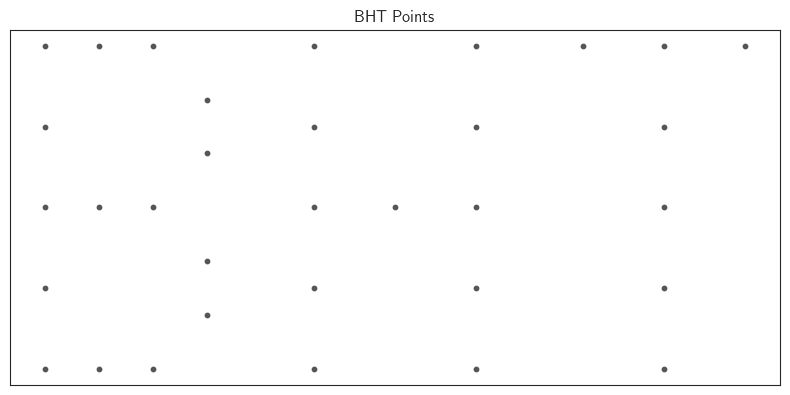

In [12]:
import matplotlib.pyplot as plt

# Assuming bht_points is already defined
x_vals = [coord[0] for coord in bht_points.values()]
y_vals = [coord[1] for coord in bht_points.values()]

plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, c=COLORS.grey, s=10)


plt.gca().set_aspect("equal")  # for square geometry
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.grid(True)
plt.title("BHT Points")
plt.tight_layout()
plt.show()

In [ ]:
import pyopencl as cl

platforms = cl.get_platforms()
for platform in platforms:
  print(f"Platform: {platform.name}")
  for device in platform.get_devices():
    print(f"  Device: {device.name}")
    print(f"    Type: {cl.device_type.to_string(device.type)}")
    print(f"    Max compute units: {device.max_compute_units}")
    print(f"    Global memory: {device.global_mem_size / (1024 ** 3):.2f} GB")
    print(f"    Max clock freq: {device.max_clock_frequency} MHz")
    print(f"    Max allocable memory: {device.max_mem_alloc_size / (1024 ** 3):.2f} GB")


c:\Users\prfej\miniconda3\envs\gnn.test\lib\site-packages\pytools\persistent_dict.py:52: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Platform: AMD Accelerated Parallel Processing
  Device: gfx1032
    Type: ALL | GPU
    Max compute units: 14
    Global memory: 7.98 GB
    Max clock freq: 2068 MHz
    Max allocable memory: 6.79 GB
  Device: gfx90c
    Type: ALL | GPU
    Max compute units: 8
    Global memory: 12.07 GB
    Max clock freq: 2000 MHz
    Max allocable memory: 9.83 GB
